In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSV file
file_path_csv = 'Mapped_Styles_with_Emotion_Categories.csv'
data_csv = pd.read_csv(file_path_csv)

# Show the first few rows of the new CSV file
data_csv.head()

,Unnamed: 0,id_x,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,id_y,Emotion_Category
0,0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,37.0,Neutral
1,1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,13.0,Contentment
2,2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,39.0,Neutral
3,3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,20.0,Anger
4,4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,28.0,Sadness


#### Check for Data Types

In [3]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          44446 non-null  int64  
 1   id_x                44446 non-null  int64  
 2   gender              44446 non-null  object 
 3   masterCategory      44446 non-null  object 
 4   subCategory         44446 non-null  object 
 5   articleType         44446 non-null  object 
 6   baseColour          44431 non-null  object 
 7   season              44425 non-null  object 
 8   year                44445 non-null  float64
 9   usage               44129 non-null  object 
 10  productDisplayName  44439 non-null  object 
 11  id_y                44431 non-null  float64
 12  Emotion_Category    44431 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 4.4+ MB


#### Check For Missing Value

In [4]:
data_csv.isna().sum()

,0
Unnamed: 0,0
id_x,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,15
season,21
year,1
usage,317


#### Check for Duplicated Rows

In [5]:
data_csv.duplicated().sum()

0

#### Check Statistical Summary

In [6]:
data_csv.describe(include="all")

,Unnamed: 0,id_x,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,id_y,Emotion_Category
count,44446.000000,44446.000000,44446,44446,44446,44446,44431,44425,44445.000000,44129,44439,44431.000000,44431
unique,NaN,NaN,5,7,45,143,46,4,NaN,8,31136,NaN,6
top,NaN,NaN,Men,Apparel,Topwear,Tshirts,Black,Summer,NaN,Casual,Lucera Women Silver Earrings,NaN,Joy
freq,NaN,NaN,22165,21400,15405,7070,9732,21476,NaN,34414,82,NaN,11697
mean,22222.500000,29692.631350,NaN,NaN,NaN,NaN,NaN,NaN,2012.805940,NaN,NaN,17.778015,NaN
std,12830.599369,17048.234982,NaN,NaN,NaN,NaN,NaN,NaN,2.126401,NaN,NaN,11.721002,NaN
min,0.000000,1163.000000,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,0.000000,NaN
25%,11111.250000,14770.250000,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,4.000000,NaN
50%,22222.500000,28609.500000,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,20.000000,NaN
75%,33333.750000,44678.750000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,27.000000,NaN


#### Assesing Data Summary

In [7]:
unique_values0 = data_csv['gender'].unique()  # Replace 'your_column_name' with the name of your column
unique_values1 = data_csv['masterCategory'].unique()  # Replace 'your_column_name' with the name of your column
unique_values2 = data_csv['subCategory'].unique()  # Replace 'your_column_name' with the name of your column

print('gender')
print(unique_values0)
print('masterCategory')
print(unique_values1)
print('subCategory')
print(unique_values2)


gender
['Men' 'Women' 'Boys' 'Girls' 'Unisex']
masterCategory
['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
subCategory
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear' 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers'
 'Skin Care' 'Makeup' 'Free Gifts' 'Ties' 'Accessories' 'Skin'
 'Beauty Accessories' 'Water Bottle' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']


In [8]:
unisex_count = data_csv[data_csv['gender'] == 'Unisex'].shape[0]
print("Count of 'unisex':", unisex_count)

Count of 'unisex': 2164


In [9]:
data_csv['gender'] = data_csv['gender'].replace({'Boys': 'Men', 'Girls': 'Women'})
data_csv = data_csv[data_csv['gender'] != 'Unisex']
print(data_csv['gender'].unique())
print(data_csv['masterCategory'].unique())


['Men' 'Women']
['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items']


In [10]:
data_csv = data_csv[data_csv['masterCategory'].isin(['Apparel', 'Footwear'])]
data_csv = data_csv.dropna()
print(data_csv['subCategory'].unique())

['Topwear' 'Bottomwear' 'Shoes' 'Flip Flops' 'Innerwear' 'Sandal' 'Saree'
 'Dress' 'Loungewear and Nightwear' 'Apparel Set' 'Socks']


In [11]:
data_csv = data_csv[~data_csv['subCategory'].isin(['Saree', 'Innerwear', 'Socks', 'Apparel Set', 'Loungewear and Nightwear'])]
print(data_csv['subCategory'].unique())
print('----------------------------------------------------------------------')
print(data_csv['articleType'].unique())

['Topwear' 'Bottomwear' 'Shoes' 'Flip Flops' 'Sandal' 'Dress']
----------------------------------------------------------------------
['Shirts' 'Jeans' 'Track Pants' 'Tshirts' 'Casual Shoes' 'Flip Flops'
 'Tops' 'Sandals' 'Sweatshirts' 'Formal Shoes' 'Flats' 'Kurtas'
 'Waistcoat' 'Sports Shoes' 'Shorts' 'Heels' 'Dresses' 'Skirts' 'Blazers'
 'Shrug' 'Trousers' 'Dupatta' 'Capris' 'Tunics' 'Jackets' 'Sports Sandals'
 'Sweaters' 'Tracksuits' 'Leggings' 'Kurtis' 'Jumpsuit' 'Suspenders'
 'Salwar and Dupatta' 'Patiala' 'Stockings' 'Tights' 'Churidar' 'Swimwear'
 'Nehru Jackets' 'Salwar' 'Jeggings' 'Rompers' 'Lehenga Choli'
 'Rain Jacket' 'Belts' 'Suits']


In [12]:
data_csv = data_csv[~data_csv['articleType'].isin(['Kurtas', 'Kurta Sets', 'Dupatta', 'Bath Robe', 'Baby Dolls', 'Kurtis', 'Suspenders', 'Salwar and Dupatta', 'Patiala', 'Churidar', 'Nehru Jackets', 'Salwar', 'Lehenga Choli', 'Clothing Set', 'Rain Jacket', 'Belts'])]
print(data_csv['articleType'].unique())

['Shirts' 'Jeans' 'Track Pants' 'Tshirts' 'Casual Shoes' 'Flip Flops'
 'Tops' 'Sandals' 'Sweatshirts' 'Formal Shoes' 'Flats' 'Waistcoat'
 'Sports Shoes' 'Shorts' 'Heels' 'Dresses' 'Skirts' 'Blazers' 'Shrug'
 'Trousers' 'Capris' 'Tunics' 'Jackets' 'Sports Sandals' 'Sweaters'
 'Tracksuits' 'Leggings' 'Jumpsuit' 'Stockings' 'Tights' 'Swimwear'
 'Jeggings' 'Rompers' 'Suits']


In [13]:
data_csv['season'] = data_csv['season'].replace(['Spring', 'Summer'], 'Sunny')
data_csv['season'] = data_csv['season'].replace(['Fall', 'Winter'], 'Rainy')
print(data_csv['season'].unique())

['Rainy' 'Sunny']


In [14]:
data_csv.describe(include="all")

,Unnamed: 0,id_x,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,id_y,Emotion_Category
count,24797.000000,24797.000000,24797,24797,24797,24797,24797,24797,24797.000000,24797,24797,24797.000000,24797
unique,NaN,NaN,2,2,6,34,43,2,NaN,7,18084,NaN,6
top,NaN,NaN,Men,Apparel,Topwear,Tshirts,Black,Sunny,NaN,Casual,Catwalk Women Black Heels,NaN,Joy
freq,NaN,NaN,16624,16112,13064,6997,5310,13534,NaN,19286,48,NaN,6936
mean,22298.183450,24354.063959,NaN,NaN,NaN,NaN,NaN,NaN,2011.763358,NaN,NaN,16.761624,NaN
std,12839.718061,16096.284395,NaN,NaN,NaN,NaN,NaN,NaN,1.268760,NaN,NaN,11.240213,NaN
min,0.000000,1163.000000,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,0.000000,NaN
25%,11135.000000,10347.000000,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,4.000000,NaN
50%,22259.000000,20943.000000,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,20.000000,NaN
75%,33416.000000,37588.000000,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,26.000000,NaN


In [15]:
data_csv.to_csv("Cleaned_Apparel2.csv", index=False)

In [16]:
data_csv.head()

,Unnamed: 0,id_x,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,id_y,Emotion_Category
0,0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Rainy,2011.0,Casual,Turtle Check Men Navy Blue Shirt,37.0,Neutral
1,1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Sunny,2012.0,Casual,Peter England Men Party Blue Jeans,13.0,Contentment
3,3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Rainy,2011.0,Casual,Manchester United Men Solid Black Track Pants,20.0,Anger
4,4,53759,Men,Apparel,Topwear,Tshirts,Grey,Sunny,2012.0,Casual,Puma Men Grey T-shirt,28.0,Sadness
5,5,1855,Men,Apparel,Topwear,Tshirts,Grey,Sunny,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,28.0,Sadness


# EDA

Distribution of Emotion Category

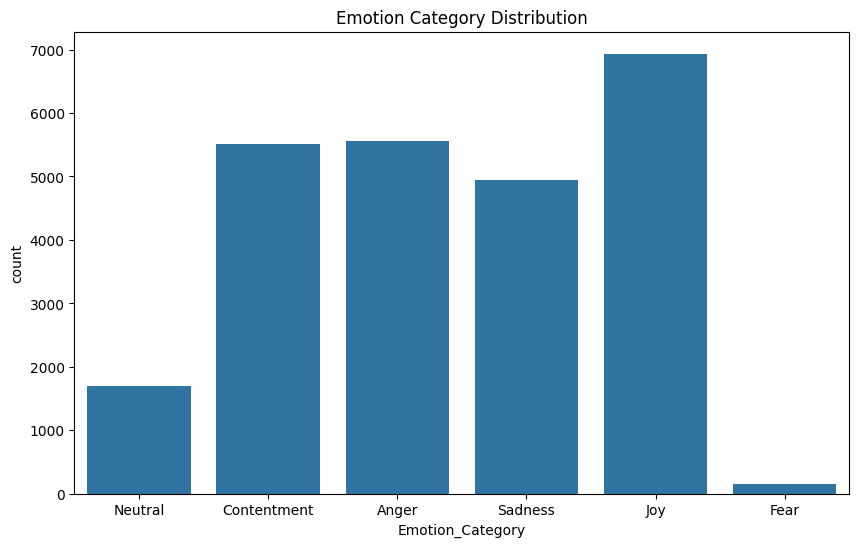

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion_Category', data=data_csv)
plt.title("Emotion Category Distribution")
plt.show()

Correlation Matrix

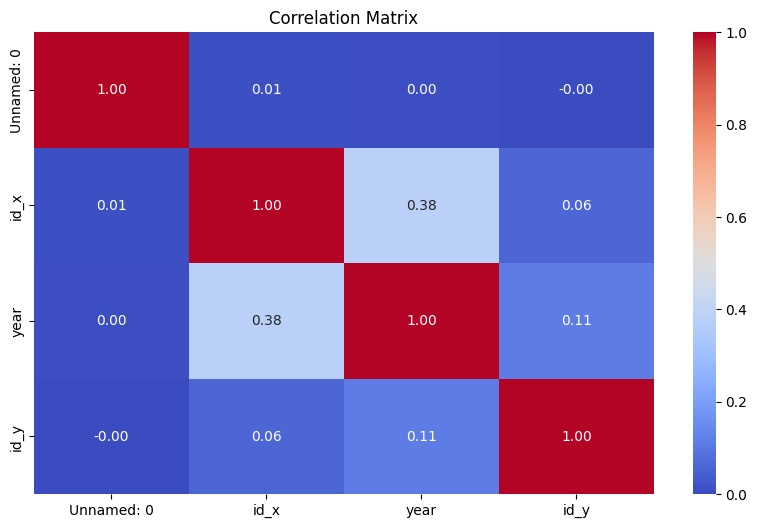

In [18]:
numeric_data = data_csv.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Data Modeling

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data_csv = pd.read_csv('Cleaned_Apparel2.csv')

Encode categorical variables using One-Hot Encoding

In [28]:
data_encoded = pd.get_dummies(data_csv[['baseColour', 'season', 'year', 'Emotion_Category']], drop_first=True)

Normalize the Data

In [29]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

In [30]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

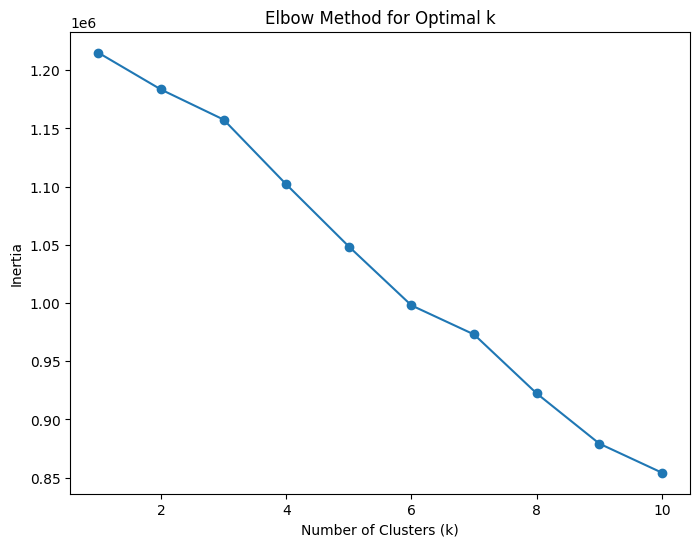

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

Apply K-Means

In [40]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_csv['Cluster'] = kmeans.fit_predict(data_scaled)

In [41]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

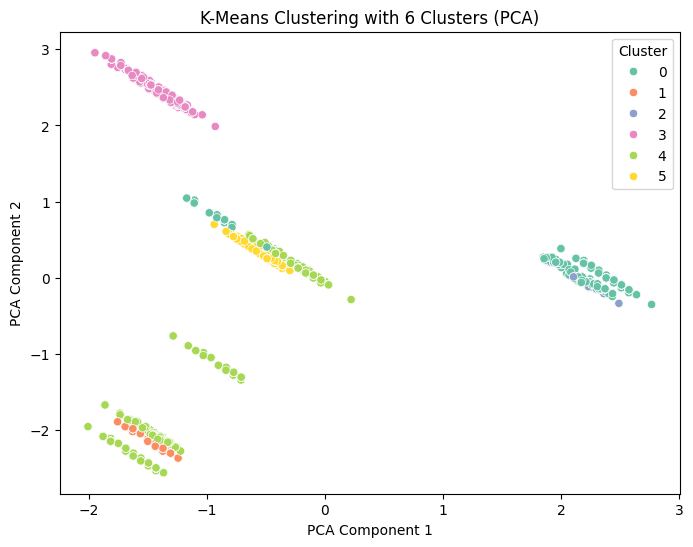

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=data_csv['Cluster'], palette='Set2')
plt.title(f'K-Means Clustering with {optimal_k} Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Analyze the Cluster Centers

In [43]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=data_encoded.columns)
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
       year  baseColour_Black  baseColour_Blue  baseColour_Bronze  \
0 -0.132712         -0.522005        -0.398080           0.108191   
1 -0.209850         -0.522005        -0.398080          -0.041678   
2 -0.079339         -0.522005        -0.398080          -0.041678   
3  0.112949         -0.522005        -0.398080          -0.041678   
4  0.061441          0.798962         0.609287          -0.041678   
5  0.017554         -0.522005        -0.398080          -0.041678   

   baseColour_Brown  baseColour_Burgundy  baseColour_Charcoal  \
0         -0.269064            -0.025410            -0.075081   
1         -0.269064            -0.025410            -0.075081   
2         -0.269064            -0.025410            -0.075081   
3          1.081813             0.102164             0.301873   
4         -0.269064            -0.025410            -0.075081   
5         -0.269064            -0.025410            -0.075081   

   baseColour_Coffee Brown  baseColour_Copp

* Cluster 0 (Joy): Items associated with positive, vibrant emotions, like bright colors and cheerful styles.
* Cluster 1 (Contentment): Clothing that embodies comfort and contentment, typically neutral or warm tones with casual styles.
* Cluster 2 (Neutral): Clothing that is versatile and neutral, lacking strong emotional tone, often in neutral colors.
* Cluster 3 (Fear): Darker colors or more intense styles, potentially more muted or edgy items.
* Cluster 4 (Sadness): Items that might represent more subdued, melancholic tones, often in darker or muted colors.
* Cluster 5 (Anger): Strong, bold colors or designs, reflecting intensity and aggression.

In [44]:
print(data_csv[['productDisplayName', 'Cluster']].head())

                              productDisplayName  Cluster
0               Turtle Check Men Navy Blue Shirt        5
1             Peter England Men Party Blue Jeans        4
2  Manchester United Men Solid Black Track Pants        4
3                          Puma Men Grey T-shirt        3
4           Inkfruit Mens Chain Reaction T-shirt        3


In [45]:
data_csv.to_csv("Apparel_with_Clusters.csv", index=False)